Data for the case are available in xlsx format.
 The data have been provided for 5000 customers.
 Detailed data dictionary has been provided for understanding the data in the data.
 Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical. You can find the details in the data dictionary

In [1]:
import numpy as np
import pandas as pd
%cd C:\\Users\\kanika2\\12AprilBatch\\Final Project\\1. Predicting Credit Card Spend & Identifying Key Drivers

C:\Users\kanika2\12AprilBatch\Final Project\1. Predicting Credit Card Spend & Identifying Key Drivers


In [2]:
DataDictionaryDF = pd.read_excel('Data Dictionary.xlsx')
DataSetDF = pd.read_excel('Data Set.xlsx')

In [3]:
DataDictionaryDF.head()

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5


In [4]:
DataSetDF.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [5]:
DataSetDF.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

In [6]:
DataSetDF.nunique()

custid         5000
region            5
townsize          5
gender            2
age              62
               ... 
ownfax            2
news              2
response_01       2
response_02       2
response_03       2
Length: 130, dtype: int64

In [8]:
#To create Y we need to sum up of cardspent(first card spent amount) and card2spent(Second card spent amount)
DataSetDF['totalspend'] = DataSetDF['cardspent'] + DataSetDF['card2spent']

In [8]:
# Drop variable cardspent and card2spent bcz its directly depend on y variable.
DataSetDF.drop(columns = ['cardspent','card2spent'], axis=1, inplace=True)

In [9]:
# pandas profiling to see the data audit report

import pandas_profiling

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Not loaded in my file due to heavy processing
# pandas_profiling.ProfileReport(DataSetDF)

##### Analysis of Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

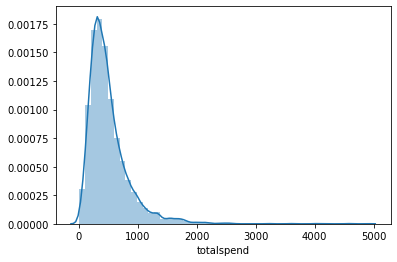

In [15]:
# Distribution of variables
sns.distplot(DataSetDF.totalspend)
plt.show()

In [16]:
# Total spend is right skewed
DataSetDF.totalspend.skew()

2.707546987697521

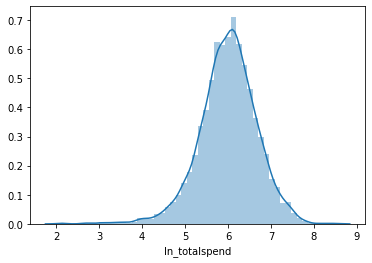

In [17]:
# Note: good practice is to take the log of the data plus 1, bcoz we don't have log of zero defined
# In thios data its not required as sales are always greater than zero

# apply log transformation: log is rescalling the data and making the distribution normal
DataSetDF['ln_totalspend'] = np.log(DataSetDF.totalspend)

# Distribution of variables
sns.distplot(DataSetDF.ln_totalspend)
plt.show()

In [18]:
# Total spend is left skewed
DataSetDF.ln_totalspend.skew()

-0.539836787814146

#### Check Linearity of Data

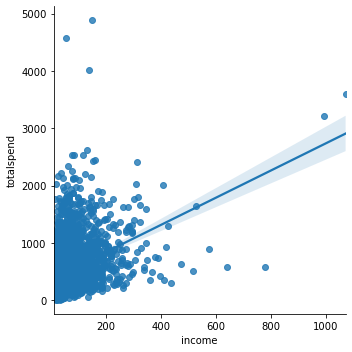

In [19]:
# Seaborn scatter plot with regression line
# aspect=1.5, scatter_kws={'alpha':0.2}) - You can choose this option too.
sns.lmplot(x='income', y='totalspend', data=DataSetDF)

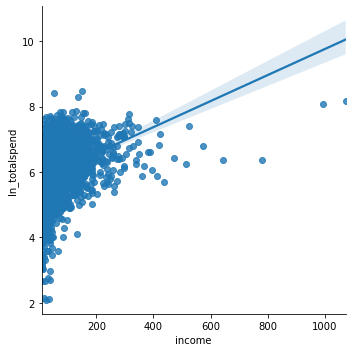

In [20]:
# Seaborn scatter plot with regression line
# aspect=1.5, scatter_kws={'alpha':0.2}) - You can choose this option too.
sns.lmplot(x='income', y='ln_totalspend', data=DataSetDF)

#### Identify Categorical and Numerical Variables

In [21]:
cat_data = ['region','townsize','gender','agecat','edcat','birthmonth','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']
#continuous_data = ['custid', 'birthmonth']

In [22]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [23]:
# Create Data audit Report for categorical variables
def categorical_var_summary( x ):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [24]:
Cat_DataSetDF = DataSetDF[cat_data]

In [25]:
Cat_DataSetDF[cat_data].apply(lambda x : categorical_var_summary(x)).T

,N,NMISS,MODE,FREQ,PERCENT
region,5000,0,5,1027,20.54
townsize,4998,2,1,1436,28.73
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
edcat,5000,0,2,1567,31.34
...,...,...,...,...,...
ownfax,5000,0,0,4106,82.12
news,5000,0,0,2637,52.74
response_01,5000,0,0,4582,91.64
response_02,5000,0,0,4351,87.02


In [26]:
for cat_feature in DataSetDF[cat_data]:
    DataSetDF[cat_feature] = DataSetDF[cat_feature].astype('category')

In [27]:
DataSetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to ln_totalspend
dtypes: category(84), float64(30), int64(15), object(1)
memory usage: 2.2+ MB


In [28]:
continuous_var = [key for key in dict(DataSetDF.dtypes) if dict(DataSetDF.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

In [29]:
DataSetDF[continuous_var]

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend,ln_totalspend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46,5.007029
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,4.350794
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97,5.886021
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41,5.884464
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,...,3.079614,1565.0,7.355641,0.00,NaN,0.00,NaN,19,1425.67,7.262397
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,...,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14,366.35,5.903589
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,...,2.724580,1070.0,6.975414,0.00,NaN,0.00,NaN,16,1527.75,7.331551
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,...,2.251292,345.0,5.843544,0.00,NaN,0.00,NaN,24,752.95,6.623999


In [30]:
continuous_varDF = DataSetDF[continuous_var]

In [31]:
continuous_varDF.apply(lambda x : continuous_var_summary(x))

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend,ln_totalspend
N,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,...,3581.000000,4.998000e+03,3578.000000,5000.000000,1344.000000,5.000000e+03,1344.000000,5000.000000,5.000000e+03,5000.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1419.000000,2.000000e+00,1422.000000,0.000000,3656.000000,0.000000e+00,3656.000000,0.000000,0.000000e+00,0.000000
SUM,235128.000000,72715.000000,273798.000000,18499.546992,49770.800000,9286.628229,-652.137155,18272.300771,3483.879384,30564.000000,...,10419.752778,3.600951e+06,22993.332638,53505.950000,4845.120915,2.109923e+06,9150.129457,98225.000000,2.490393e+06,30006.220213
MEAN,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,...,2.909733,7.204784e+02,6.426309,10.701190,3.605001,4.219846e+02,6.808132,19.645000,4.980786e+02,6.001244
MEDIAN,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,...,2.904165,4.250000e+02,6.639876,0.000000,3.597997,0.000000e+00,7.147185,20.000000,4.142500e+02,6.026470
STD,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,...,0.564859,9.222255e+02,1.172050,19.799837,0.390102,1.001003e+03,1.283967,5.165609,3.515293e+02,0.671473
VAR,315.784902,10.765504,3066.668742,0.558116,40.957226,11.667225,1.620678,29.107876,1.273689,59.962069,...,0.319066,8.504999e+05,1.373700,392.033527,0.152179,1.002008e+06,1.648571,26.683512,1.235728e+05,0.450876
MIN,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.000000,...,1.178655,0.000000e+00,1.558145,0.000000,2.541602,0.000000e+00,2.541602,0.000000,8.110000e+00,2.093098
P1,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,...,1.658228,0.000000e+00,2.484907,0.000000,2.806811,0.000000e+00,3.039749,0.000000,5.819760e+01,4.063844
P5,20.000000,9.000000,13.000000,2.564949,1.900000,0.101088,-2.291604,0.287692,-1.243483,-1.000000,...,1.981001,0.000000e+00,4.094345,0.000000,2.992964,0.000000e+00,4.114134,12.000000,1.331060e+02,4.891146


# Data Preparation Steps

In [32]:
#Handling Outlier
continuous_varDF = continuous_varDF.apply(lambda x: x.clip(lower = x.quantile(0.01),
                                                         upper = x.quantile(0.99)))

In [33]:
continuous_varDF.isnull().sum() 

age                  0
ed                   0
income               0
lninc                0
debtinc              0
creddebt             0
lncreddebt           1
othdebt              0
lnothdebt            1
spoused              0
reside               0
pets                 0
pets_cats            0
pets_dogs            0
pets_birds           0
pets_reptiles        0
pets_small           0
pets_saltfish        0
pets_freshfish       0
carvalue             0
commutetime          2
tenure               0
longmon              0
lnlongmon            0
longten              3
lnlongten            3
tollmon              0
lntollmon         2622
tollten              0
lntollten         2622
equipmon             0
lnequipmon        3296
equipten             0
lnequipten        3296
cardmon              0
lncardmon         1419
cardten              2
lncardten         1422
wiremon              0
lnwiremon         3656
wireten              0
lnwireten         3656
hourstv              0
totalspend 

#### 1.)  Missing Treatment 

In [34]:
#Missing Imputation 
#Categorical
def missing_Imputation1(x):
    x.fillna(x.mode())
    return x

#Continuous 
def missing_Imputation_Continuous(x):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x.fillna(x.mean())
        return x
    
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [35]:
#Cat_DataSetDF.fillna(0, inplace = True)
Cat_DataSetDF.fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [37]:
for cat_feature in Cat_DataSetDF[cat_data]:
    Cat_DataSetDF[cat_feature] = Cat_DataSetDF[cat_feature].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
Cat_DataSetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   region             5000 non-null   category
 1   townsize           5000 non-null   category
 2   gender             5000 non-null   category
 3   agecat             5000 non-null   category
 4   edcat              5000 non-null   category
 5   birthmonth         5000 non-null   category
 6   jobcat             5000 non-null   category
 7   union              5000 non-null   category
 8   employ             5000 non-null   category
 9   empcat             5000 non-null   category
 10  retire             5000 non-null   category
 11  inccat             5000 non-null   category
 12  default            5000 non-null   category
 13  jobsat             5000 non-null   category
 14  marital            5000 non-null   category
 15  spousedcat         5000 non-null   category
 16  homeow

In [39]:
continuous_varDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   ed              5000 non-null   int64  
 2   income          5000 non-null   float64
 3   lninc           5000 non-null   float64
 4   debtinc         5000 non-null   float64
 5   creddebt        5000 non-null   float64
 6   lncreddebt      4999 non-null   float64
 7   othdebt         5000 non-null   float64
 8   lnothdebt       4999 non-null   float64
 9   spoused         5000 non-null   int64  
 10  reside          5000 non-null   int64  
 11  pets            5000 non-null   int64  
 12  pets_cats       5000 non-null   int64  
 13  pets_dogs       5000 non-null   int64  
 14  pets_birds      5000 non-null   int64  
 15  pets_reptiles   5000 non-null   int64  
 16  pets_small      5000 non-null   int64  
 17  pets_saltfish   5000 non-null   i

In [40]:
continuous_varDF.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend,ln_totalspend
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,4.350794
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97,5.886021
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,...,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41,5.884464
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83,6.230147


In [41]:
Cat_DataSetDF.head()

,region,townsize,gender,agecat,edcat,birthmonth,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,September,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,May,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,June,2,0,16,5,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,May,2,0,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,July,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


In [42]:
continuous_varDF.fillna(0, inplace = True)

In [43]:
continuous_varDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   ed              5000 non-null   int64  
 2   income          5000 non-null   float64
 3   lninc           5000 non-null   float64
 4   debtinc         5000 non-null   float64
 5   creddebt        5000 non-null   float64
 6   lncreddebt      5000 non-null   float64
 7   othdebt         5000 non-null   float64
 8   lnothdebt       5000 non-null   float64
 9   spoused         5000 non-null   int64  
 10  reside          5000 non-null   int64  
 11  pets            5000 non-null   int64  
 12  pets_cats       5000 non-null   int64  
 13  pets_dogs       5000 non-null   int64  
 14  pets_birds      5000 non-null   int64  
 15  pets_reptiles   5000 non-null   int64  
 16  pets_small      5000 non-null   int64  
 17  pets_saltfish   5000 non-null   i

In [44]:
continuous_varDF = continuous_varDF.apply(lambda x : missing_Imputation_Continuous(x))

In [45]:
Cat_DataSetDF = Cat_DataSetDF.apply(missing_imputation)

In [46]:
continuous_varDF.isnull().sum()

age               0
ed                0
income            0
lninc             0
debtinc           0
creddebt          0
lncreddebt        0
othdebt           0
lnothdebt         0
spoused           0
reside            0
pets              0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
pets_freshfish    0
carvalue          0
commutetime       0
tenure            0
longmon           0
lnlongmon         0
longten           0
lnlongten         0
tollmon           0
lntollmon         0
tollten           0
lntollten         0
equipmon          0
lnequipmon        0
equipten          0
lnequipten        0
cardmon           0
lncardmon         0
cardten           0
lncardten         0
wiremon           0
lnwiremon         0
wireten           0
lnwireten         0
hourstv           0
totalspend        0
ln_totalspend     0
dtype: int64

In [47]:
Cat_DataSetDF.isnull().sum()

region         0
townsize       0
gender         0
agecat         0
edcat          0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 84, dtype: int64

In [48]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [49]:
for c_feature in Cat_DataSetDF.columns:
    Cat_DataSetDF = create_dummies(Cat_DataSetDF, c_feature)

In [50]:
Cat_DataSetDF.head(2)

,region_2,region_3,region_4,region_5,townsize_1.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0


In [51]:
custFinalDataSetDF = pd.concat([continuous_varDF, Cat_DataSetDF], axis=1)

In [52]:
custFinalDataSetDF.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,0,0,0,1,1,0,0,0,1,0
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,1,1,1,1,1,1,1,0,0,0
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,1,0,0,0,0,0,1,0,0,0
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,...,1,0,1,1,1,0,1,1,0,0
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,1,0,1,0,1,0,0,0,1,0


In [53]:
#custFinalDataSetDF = custFinalDataSetDF.apply(lambda x : missing_Imputation_Continuous(x))

#### In the above graph, our data is not distributed normally perfectly, so use boxcox techniue to make it perfect normal

In [54]:
custFinalDataSetDF['totalspend']

0        149.46
1         77.54
2        359.97
3        359.41
4        507.83
         ...   
4995    1425.67
4996     366.35
4997    1527.75
4998     752.95
4999     407.86
Name: totalspend, Length: 5000, dtype: float64

<AxesSubplot:xlabel='ln_totalspend'>

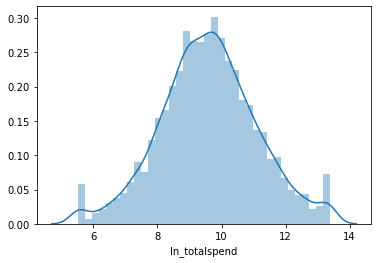

In [55]:
# transform training data & save lambda value
custFinalDataSetDF['ln_totalspend'],fitted_lambda = stats.boxcox(custFinalDataSetDF['totalspend'])
sns.distplot(custFinalDataSetDF.ln_totalspend)

In [56]:
custFinalDataSetDF['ln_totalspend'].skew()

0.004511862332035539

In [57]:
# DataSetDF Total spend

<AxesSubplot:xlabel='ln_totalspend'>

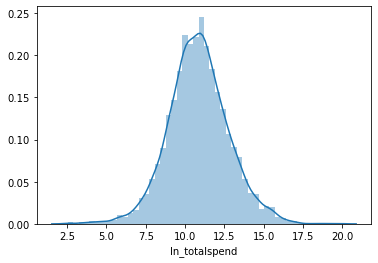

In [58]:
# transform training data & save lambda value
DataSetDF['ln_totalspend'],fitted_lambda = stats.boxcox(DataSetDF['totalspend'])
sns.distplot(DataSetDF.ln_totalspend)

In [59]:
import pylab

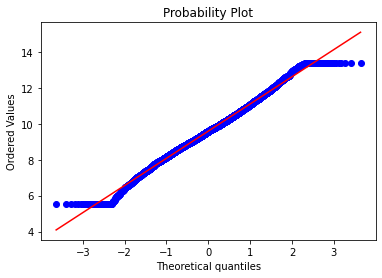

In [60]:
stats.probplot(custFinalDataSetDF.ln_totalspend, dist="norm", plot=pylab )
pylab.show()

In [61]:
#Drop the y variables(totalspend) from dataframe because we are looking correlation between all x variables

#DataSetDF.drop(['totalspend'],axis=1,inplace=True)

#### Divide the data in Train n Test data

In [62]:
custFinalDataSetDF['ln_totalspend']

0        7.323447
1        6.039640
2        9.243615
3        9.239995
4       10.063778
          ...    
4995    12.781235
4996     9.284513
4997    12.978062
4998    11.053472
4999     9.536633
Name: ln_totalspend, Length: 5000, dtype: float64

In [63]:
feature_columns=custFinalDataSetDF.columns.difference(['ln_total_spend'])

In [64]:
feature_columns

Index(['active_1', 'address_1', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       ...
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'union_1', 'voice_1', 'vote_1', 'wireless_1', 'wiremon', 'wireten'],
      dtype='object', length=402)

In [65]:
from sklearn.model_selection import train_test_split
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [66]:
# seperate the X and y columns
features = custFinalDataSetDF[feature_columns]
target = custFinalDataSetDF.ln_totalspend
# do the f_regression
F_values, p_values  = f_regression( features, target )
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T
# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]

In [67]:
feature_columns = list(F_regression_op.loc[ F_regression_op.p_values <= 0.1, 'Features' ])

In [68]:
F_regression_op

,Features,F_values,p_values
0,active_1,0.16,0.6861
1,address_1,10.83,0.001
2,address_10,0.91,0.3414
3,address_11,0.83,0.3631
4,address_12,0.06,0.7993
...,...,...,...
397,voice_1,9.59,0.002
398,vote_1,16.82,0
399,wireless_1,27.03,0
400,wiremon,38.57,0


In [69]:
custFinalDataSetDF[feature_columns]

,address_1,address_14,address_15,address_18,address_2,address_22,address_28,address_3,address_32,address_4,...,tenure,tollfree_1,tollmon,tollten,totalspend,voice_1,vote_1,wireless_1,wiremon,wireten
0,0,0,0,0,0,0,0,0,0,0,...,5,1,29.0,161.05,149.46,1,1,0,0.00,0.00
1,0,0,0,0,1,0,0,0,0,0,...,39,0,0.0,0.00,77.54,1,0,1,45.65,1683.55
2,0,0,0,0,0,0,0,0,0,0,...,65,0,0.0,0.00,359.97,0,0,0,0.00,0.00
3,0,0,0,0,0,0,0,1,0,0,...,36,0,0.0,0.00,359.41,0,0,0,0.00,0.00
4,0,0,0,0,0,0,0,1,0,0,...,21,1,16.5,387.70,507.83,1,0,1,19.05,410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,69,0,0.0,0.00,1425.67,0,1,0,0.00,0.00
4996,0,0,0,0,0,0,0,0,0,0,...,30,1,36.5,1157.20,366.35,0,0,1,27.90,757.35
4997,0,0,0,0,0,0,0,0,0,0,...,72,1,44.0,3322.50,1527.75,0,0,0,0.00,0.00
4998,0,0,0,0,0,0,0,0,0,0,...,37,0,0.0,0.00,752.95,0,0,0,0.00,0.00


In [70]:
custFinalDataSetDF['ln_totalspend']

0        7.323447
1        6.039640
2        9.243615
3        9.239995
4       10.063778
          ...    
4995    12.781235
4996     9.284513
4997    12.978062
4998    11.053472
4999     9.536633
Name: ln_totalspend, Length: 5000, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(custFinalDataSetDF[feature_columns],
                                              custFinalDataSetDF['ln_totalspend'],
                                              test_size=0.3,
                                              random_state=12)

In [72]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

3500
1500
3500
1500


# Feature selection by random forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [74]:
RandomForestRegressor?
#GridSearchCV?
#np.arange?

In [75]:
param_grid={'n_estimators':np.arange(10,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y) 

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=True),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': array([10, 11, 1

In [76]:
tree.best_params_

{'n_estimators': 23}

In [77]:
# take n_estimators :  18
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=18)
radm_clf.fit( train_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=18,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [78]:
print(dir(radm_clf))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'base_estimator_', 'bootstrap', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'estimators_', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 

In [79]:
radm_clf.oob_score_

0.991104438943572

In [80]:
from sklearn import metrics

In [81]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )

In [82]:
train_x.shape

(3500, 158)

<AxesSubplot:xlabel='importance', ylabel='feature'>

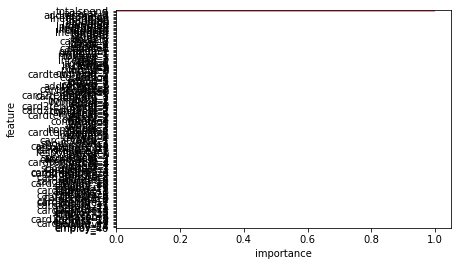

In [83]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [84]:
feature_rank

,rank,feature,importance
0,1,totalspend,9.999791e-01
1,2,agecat_5,1.635114e-06
2,3,addresscat_3,1.229304e-06
3,4,ed,7.649688e-07
4,5,lntollmon,7.125206e-07
...,...,...,...
153,154,cardtenure_29,3.409617e-10
154,155,owntv_1,3.022097e-10
155,156,employ_52,5.177997e-11
156,157,employ_24,5.029189e-12


In [152]:
#Select features and then convert it into list
rf_features=feature_rank.loc[0:60,['feature']]
rf_features=rf_features['feature'].tolist()
print(rf_features)
#rf_features.append('ln_totalspend')
custFinalDataSetDF_rf= custFinalDataSetDF[rf_features]
custFinalDataSetDF_rf.head()

['totalspend', 'agecat_5', 'addresscat_3', 'ed', 'lntollmon', 'lnequipmon', 'lninc', 'longmon', 'tollmon', 'carvalue', 'lnlongten', 'lnlongmon', 'lnothdebt', 'lncardmon', 'creddebt', 'lncreddebt', 'longten', 'othdebt', 'tollten', 'edcat_3', 'hourstv', 'cartype_0', 'jobcat_2', 'bfast_2', 'cardten', 'edcat_2', 'callwait_1', 'spoused', 'ownpda_1', 'income', 'owndvd_1', 'multline_1', 'tollfree_1', 'bfast_3', 'vote_1', 'internet_3', 'ebill_1', 'agecat_6', 'news_1', 'tenure', 'lncardten', 'polview_4', 'inccat_3', 'lntollten', 'ownipod_1', 'cardtenurecat_5', 'card_2', 'card2_2', 'equipmon', 'callid_1', 'region_5', 'jobsat_4', 'carown_1', 'polview_6', 'addresscat_4', 'cars_1', 'carcatvalue_3', 'lnequipten', 'equipten', 'gender_1', 'card2tenurecat_5']


,totalspend,agecat_5,addresscat_3,ed,lntollmon,lnequipmon,lninc,longmon,tollmon,carvalue,...,jobsat_4,carown_1,polview_6,addresscat_4,cars_1,carcatvalue_3,lnequipten,equipten,gender_1,card2tenurecat_5
0,149.46,0,0,15,3.367296,3.384390,3.433987,6.50,29.0,14.3,...,0,1,1,0,0,0,4.837075,126.1,1,0
1,77.54,0,0,17,0.000000,4.004602,2.708050,8.90,0.0,6.8,...,0,1,0,0,0,0,7.588324,1975.0,0,0
2,359.97,0,0,14,0.000000,0.000000,3.555348,28.40,0.0,18.8,...,1,1,0,0,0,0,0.000000,0.0,1,1
3,359.41,0,0,16,0.000000,0.000000,2.995732,6.00,0.0,8.7,...,0,1,0,0,0,0,0.000000,0.0,0,0
4,507.83,0,0,16,2.803360,0.000000,3.135494,3.05,16.5,10.6,...,0,0,0,0,1,0,0.000000,0.0,0,0


# Find multicolinearlity

In [146]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [153]:
#selected features
rf_features.append('ln_totalspend')
custFinalDataSetDF_rf= custFinalDataSetDF[rf_features]

custFinalDataSetDF_rf.head(5)

,totalspend,agecat_5,addresscat_3,ed,lntollmon,lnequipmon,lninc,longmon,tollmon,carvalue,...,carown_1,polview_6,addresscat_4,cars_1,carcatvalue_3,lnequipten,equipten,gender_1,card2tenurecat_5,ln_totalspend
0,149.46,0,0,15,3.367296,3.384390,3.433987,6.50,29.0,14.3,...,1,1,0,0,0,4.837075,126.1,1,0,7.323447
1,77.54,0,0,17,0.000000,4.004602,2.708050,8.90,0.0,6.8,...,1,0,0,0,0,7.588324,1975.0,0,0,6.039640
2,359.97,0,0,14,0.000000,0.000000,3.555348,28.40,0.0,18.8,...,1,0,0,0,0,0.000000,0.0,1,1,9.243615
3,359.41,0,0,16,0.000000,0.000000,2.995732,6.00,0.0,8.7,...,1,0,0,0,0,0.000000,0.0,0,0,9.239995
4,507.83,0,0,16,2.803360,0.000000,3.135494,3.05,16.5,10.6,...,0,0,0,1,0,0.000000,0.0,0,0,10.063778


In [154]:
#gather features
features = "+".join(rf_features)
# separate y and X dataframes based on this regression: 
y, X = dmatrices('ln_totalspend~' + features,custFinalDataSetDF_rf, return_type='dataframe')

In [163]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
5,1213.142392,lntollmon
0,417.319471,Intercept
33,404.314925,tollfree_1
6,208.540827,lnequipmon
9,171.994358,tollmon
...,...,...
21,1.059123,hourstv
52,1.042805,jobsat_4
56,1.028584,cars_1
60,1.018529,gender_1


In [158]:
#Select only those features whose Vif is greater than 10.
vif1=vif[vif['VIF Factor']>11].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars

['lntollmon',
 'lnequipmon',
 'longmon',
 'tollmon',
 'lnlongten',
 'lnlongmon',
 'lncardmon',
 'longten',
 'tollten',
 'tollfree_1',
 'tenure',
 'lncardten',
 'lntollten',
 'equipmon',
 'lnequipten',
 'equipten']

In [165]:
custFinalDataSetDF_rf.head()

,totalspend,agecat_5,addresscat_3,ed,lninc,carvalue,lnothdebt,creddebt,lncreddebt,othdebt,...,region_5,jobsat_4,carown_1,polview_6,addresscat_4,cars_1,carcatvalue_3,gender_1,card2tenurecat_5,ln_totalspend
0,149.46,0,0,15,3.433987,14.3,0.806516,1.200909,0.183079,2.240091,...,0,0,1,1,0,0,0,1,0,7.323447
1,77.54,0,0,17,2.708050,6.8,0.449788,1.222020,0.200505,1.567980,...,1,0,1,0,0,0,0,0,0,6.039640
2,359.97,0,0,14,3.555348,18.8,0.930738,0.928620,-0.074056,2.536380,...,0,1,1,0,0,0,0,1,1,9.243615
3,359.41,0,0,16,2.995732,8.7,0.110826,0.033160,-3.401690,1.117200,...,0,0,1,0,0,0,0,0,0,9.239995
4,507.83,0,0,16,3.135494,10.6,-1.735336,0.214659,-1.538705,0.176341,...,0,0,0,0,0,1,0,0,0,10.063778


In [160]:
# dropping variables that have VIF greater than 11
custFinalDataSetDF_rf.drop(drop_vars,axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
custFinalDataSetDF_rf.shape

(5000, 46)

#### Check Linear Relationship

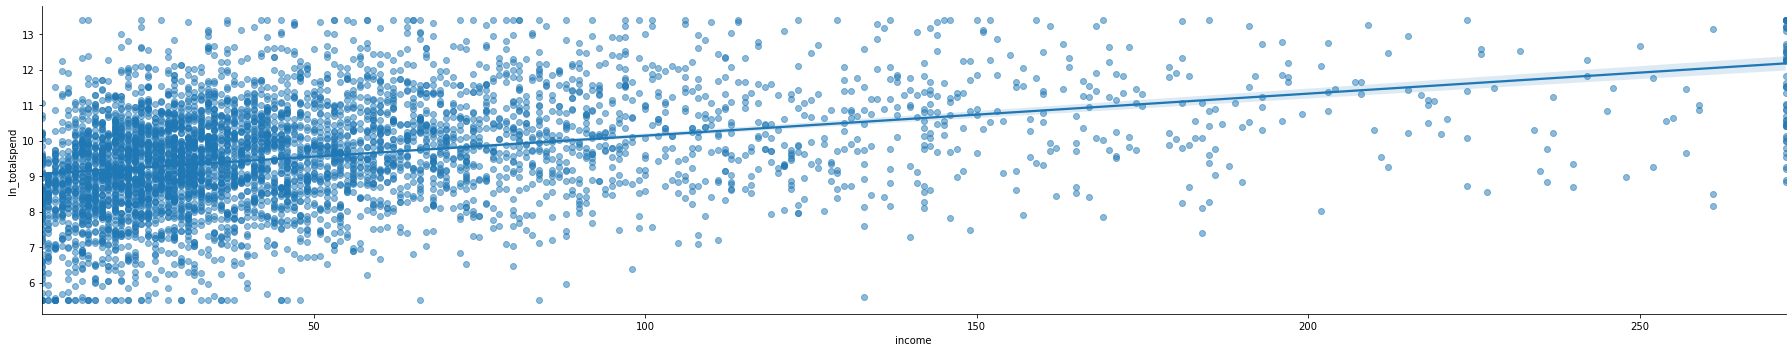

In [166]:
sns.lmplot(x="income",y="ln_totalspend",data=custFinalDataSetDF_rf,aspect=5,scatter_kws={'alpha':0.5})

####  Splitting data for training and testing

In [167]:
custFinalDataSetDF_rf

,totalspend,agecat_5,addresscat_3,ed,lninc,carvalue,lnothdebt,creddebt,lncreddebt,othdebt,...,region_5,jobsat_4,carown_1,polview_6,addresscat_4,cars_1,carcatvalue_3,gender_1,card2tenurecat_5,ln_totalspend
0,149.46,0,0,15,3.433987,14.300,0.806516,1.200909,0.183079,2.240091,...,0,0,1,1,0,0,0,1,0,7.323447
1,77.54,0,0,17,2.708050,6.800,0.449788,1.222020,0.200505,1.567980,...,1,0,1,0,0,0,0,0,0,6.039640
2,359.97,0,0,14,3.555348,18.800,0.930738,0.928620,-0.074056,2.536380,...,0,1,1,0,0,0,0,1,1,9.243615
3,359.41,0,0,16,2.995732,8.700,0.110826,0.033160,-3.401690,1.117200,...,0,0,1,0,0,0,0,0,0,9.239995
4,507.83,0,0,16,3.135494,10.600,-1.735336,0.214659,-1.538705,0.176341,...,0,0,0,0,0,1,0,0,0,10.063778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1425.67,0,0,10,5.278115,64.500,2.047166,7.934080,2.071167,7.745920,...,0,0,1,0,1,1,1,0,1,12.781235
4996,366.35,1,1,14,4.418841,40.000,2.209746,3.336600,1.204952,9.113400,...,0,0,1,0,0,0,1,0,0,9.284513
4997,1527.75,0,0,17,4.682131,53.600,2.092664,3.557520,1.269064,8.106480,...,0,0,1,0,0,0,1,0,1,12.978062
4998,752.95,0,0,19,5.241747,92.001,2.733760,5.021352,1.613699,15.390648,...,0,1,1,0,1,0,1,0,0,11.053472


In [168]:
custFinalDataSetDF_rf.columns.difference?

In [ ]:
#feature_columns = list(set(vif.loc[:, 'Features']).difference(['carvalue','']))

In [173]:
# Dropping variables which have p-values greater than 5%
feature_columns=custFinalDataSetDF_rf.columns.difference(['ln_totalspend','lninc','carvalue','income','totalspend'])

In [177]:
train_x,test_x,train_y,test_y=train_test_split(custFinalDataSetDF_rf[feature_columns],
                                              custFinalDataSetDF_rf['ln_totalspend'],
                                               test_size=.3,
                                               random_state=2)

In [ ]:
# method 2: divide the data into training and testing
train, test = train_test_split( custFinalDataSetDF_rf, test_size = 0.3, random_state = 2 )

In [186]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  3500  |  No of obs in testing:  1500


#### Build Regression model(statsmodels.api)

#### Steps for model building:
------------------------------------------------------------------
Step 1: lm = smf.ols('y~x1+x2+x3...xn', data = train) # defining Y and X with classs

Step 2: lm.fit()     # building model (estimating the betas)

Step 3: lm.summary() # get the output summary of the model

Step 4: lm.predict(train) # predict the sales on the training data

Step 5: lm.predict(test) # predict the sales on the testing/validation data

Step 6: test the accuracy of the model
    a.  MAPE: Mean Absolute Percentage Error
    b.  RMSE: Root Mean Square Error
    c.  Corelation between actual and predicted
    d.  Decile analysis: for validation of models - Business validation

In [215]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [181]:
m0_equation = 'ln_totalspend ~ ' + ' + '.join(feature_columns)

In [187]:
# building model (estimating the betas)
lm0 = smf.ols( m0_equation, train ).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [188]:
# get the output summary of the model
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_totalspend   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     17.62
Date:                Mon, 07 Sep 2020   Prob (F-statistic):          1.49e-112
Time:                        17:13:17   Log-Likelihood:                -6149.0
No. Observations:                3500   AIC:                         1.238e+04
Df Residuals:                    3458   BIC:                         1.264e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.2347      0.197  

In [190]:
lm0.pvalues.sort_values(ascending=False)

ebill_1             9.976750e-01
ed                  9.911278e-01
jobsat_4            9.027998e-01
vote_1              8.481092e-01
edcat_2             8.324305e-01
ownipod_1           8.307208e-01
addresscat_4        8.097980e-01
bfast_3             7.613846e-01
addresscat_3        6.293709e-01
hourstv             6.237903e-01
callwait_1          6.098217e-01
cardtenurecat_5     5.889120e-01
callid_1            5.765955e-01
creddebt            5.698495e-01
polview_4           5.344695e-01
news_1              5.296962e-01
agecat_5            4.975895e-01
edcat_3             4.429761e-01
cardten             4.152708e-01
multline_1          2.848754e-01
polview_6           2.752834e-01
spoused             2.718224e-01
ownpda_1            2.581569e-01
othdebt             2.372222e-01
cars_1              1.908129e-01
jobcat_2            1.626848e-01
internet_3          1.614470e-01
bfast_2             1.309892e-01
card2tenurecat_5    1.287795e-01
cartype_0           8.494790e-02
carown_1  

In [192]:
print('Parameters:', lm0.params) # Find the parameters of x i.e Beta value
print('R2: ', lm0.rsquared) # Find the r**2

Parameters: Intercept           9.234715
addresscat_3        0.029621
addresscat_4        0.015300
agecat_5            0.048664
agecat_6           -0.160393
bfast_2            -0.109849
bfast_3            -0.018002
callid_1           -0.034555
callwait_1         -0.031323
carcatvalue_3       0.715972
card2_2            -0.405208
card2tenurecat_5   -0.139160
card_2             -0.451089
cardten             0.000032
cardtenurecat_5     0.047811
carown_1            0.105784
cars_1             -0.075827
cartype_0          -0.083963
creddebt            0.010478
ebill_1             0.000179
ed                  0.000103
edcat_2             0.012247
edcat_3             0.048469
gender_1           -0.179537
hourstv             0.002324
inccat_3            0.284064
internet_3          0.106375
jobcat_2           -0.073850
jobsat_4            0.007344
lncreddebt          0.108978
lnothdebt           0.090630
multline_1         -0.062244
news_1              0.036103
othdebt             0.013572
ow

####  Evolution of Model Accuracy 

In [195]:
# predict the sales on the training data
train_pred=lm0.predict(train_x)
# predict the sales on the testing/validation data
test_pred=lm0.predict(test_x)

In [198]:
print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 1.8663307506504279
MSE Train: 1.9656956525138582


In [199]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.06601679618721
MSE: 1.8663307506504279
RMSE: 1.3661371639225792


### Execute the model on training and testing samples

In [229]:
# Step 4: predict the sales on the training data
train['pred_sales'] = np.exp(lm0.predict(train))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [230]:
# Step 5: predict the sales on the testing/validation data
test['pred_sales'] = np.exp(lm0.predict(test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#####  model validation for prediction

In [236]:
# Step 6: accuracy metrics (b. RMSE: Root Mean Squared Error)
RMSE_train = mean_squared_error(train.ln_totalspend ,train.pred_sales).round(3)
RMSE_test = mean_squared_error(test.ln_totalspend ,test.pred_sales).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  527482817.863  |  RMSE of testing data:  530591188.051


In [233]:
# Step 6: accuracy metrics (c. Correlation)
Corr_train = stats.stats.pearsonr(train.ln_totalspend, train.pred_sales)
Corr_test = stats.stats.pearsonr(train.ln_totalspend, train.pred_sales)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.37635448641592156, 3.460743686690374e-118)  |  Correlation of testing data:  (0.37635448641592156, 3.460743686690374e-118)


In [234]:
# Step 6: accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_sales'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_sales'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_sales']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = train[['Deciles', 'ln_totalspend']].groupby(train.Deciles).mean().sort_index(ascending = False)['ln_totalspend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for train data
Predicted_avg = test[['Deciles', 'pred_sales']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = test[['Deciles', 'ln_totalspend']].groupby(test.Deciles).mean().sort_index(ascending = False)['ln_totalspend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Using Q-Q plot to check Normality and Residuals

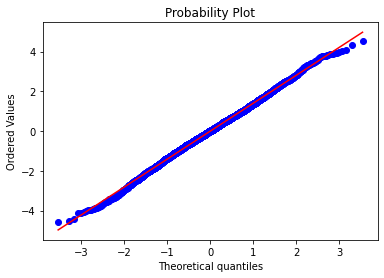

In [220]:
#Q-Q plot using residual ID
stats.probplot(lm0.resid,dist='norm',plot=pylab)
pylab.show()

<AxesSubplot:>

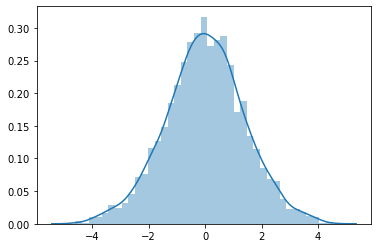

In [222]:
#Normality using residual ID
sns.distplot(lm0.resid)

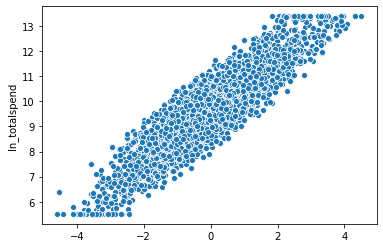

In [223]:
# scatterplot
# assumption: homoscedasticity of residuals/errors
sns.scatterplot(lm0.resid, train.ln_totalspend)
plt.show()

##### Calculating manually residual

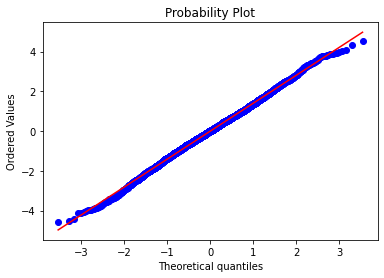

In [204]:
residuals=train_y-train_pred
stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

<AxesSubplot:>

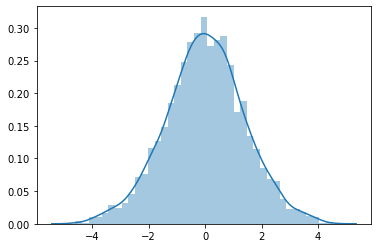

In [203]:
sns.distplot(residuals)

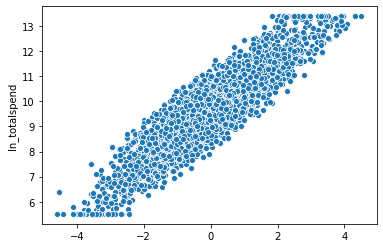

In [226]:
# assumption: homoscedasticity of residuals/errors
sns.scatterplot(residuals, train.ln_totalspend)
plt.show()

In [217]:
# assumption: mean of residuals/errors is zero
print(lm0.resid.mean())

5.064799373550548e-14


In [219]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(lm0.resid, train.ln_totalspend))

(0.9095144871762785, 0.0)


In this example, data samples random values from a normal distribution, and the Q-Q plot is almost linear as a result, the residuals are normally distributed, so our assumption is not violated

#### Predicting Sales

In [237]:
custFinalDataSetDF_rf=custFinalDataSetDF_rf[feature_columns]
custFinalDataSetDF_rf=sm.add_constant(custFinalDataSetDF_rf)
custFinalDataSetDF_rf.head()

,const,addresscat_3,addresscat_4,agecat_5,agecat_6,bfast_2,bfast_3,callid_1,callwait_1,carcatvalue_3,...,news_1,othdebt,owndvd_1,ownipod_1,ownpda_1,polview_4,polview_6,region_5,spoused,vote_1
0,1.0,0,0,0,0,0,1,0,1,0,...,0,2.240091,1,1,0,0,1,0,-1,1
1,1.0,0,0,0,0,0,0,1,0,0,...,1,1.567980,1,1,1,1,0,1,-1,0
2,1.0,0,0,0,1,0,1,0,0,0,...,1,2.536380,1,0,0,0,0,0,13,0
3,1.0,0,0,0,0,0,0,0,0,0,...,1,1.117200,1,1,0,0,0,0,18,0
4,1.0,0,0,0,0,0,1,1,1,0,...,0,0.176341,1,0,0,1,0,0,13,0


In [241]:
from scipy.special import boxcox, inv_boxcox

In [251]:
# Final prediction on test file
pred_totalSpend=inv_boxcox(lm0.predict(custFinalDataSetDF_rf),fitted_lambda)
pred_totalSpend=pd.DataFrame(pred_totalSpend.tolist())
pred_totalSpend.columns = ['pred_totalSpend']

#Concatenating final prediction with original test file   
testfile = pd.concat([custFinalDataSetDF_rf, pred_totalSpend], axis=1)
testfile.head()

,const,addresscat_3,addresscat_4,agecat_5,agecat_6,bfast_2,bfast_3,callid_1,callwait_1,carcatvalue_3,...,othdebt,owndvd_1,ownipod_1,ownpda_1,polview_4,polview_6,region_5,spoused,vote_1,pred_totalSpend
0,1.0,0,0,0,0,0,1,0,1,0,...,2.240091,1,1,0,0,1,0,-1,1,273.830299
1,1.0,0,0,0,0,0,0,1,0,0,...,1.567980,1,1,1,1,0,1,-1,0,255.160239
2,1.0,0,0,0,1,0,1,0,0,0,...,2.536380,1,0,0,0,0,0,13,0,214.104836
3,1.0,0,0,0,0,0,0,0,0,0,...,1.117200,1,1,0,0,0,0,18,0,216.686302
4,1.0,0,0,0,0,0,1,1,1,0,...,0.176341,1,0,0,1,0,0,13,0,240.251399


In [252]:
#Export the final result  
testfile.to_csv('Final_credit_spend_Output.csv',index=False)